<a href="https://colab.research.google.com/github/vikpy/MLASem3/blob/master/ML_Application_Assignment_1_California_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install pyforest 
from pyforest import * 

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=562f4f6c1f4d744bc62d5e056c26ace95c2dba8769b8b1cf04319212022738bb
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [8]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/vikpy/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(housing_path)
  housing_tgz.close()

In [9]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [78]:
fetch_housing_data()
df = load_housing_data()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [33]:
import plotly.express as px
key = pd.read_csv("/content/key.txt")
px.set_mapbox_access_token(key.iloc[0,0])

fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        color="median_house_value",
                        size="population",
                        opacity=0.999,
#                        color_continuous_scale=px.colors.sequential.Rainbow,
                        hover_name = "median_house_value",
                        mapbox_style = "satellite",
                        zoom = 10               
                       )
fig.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

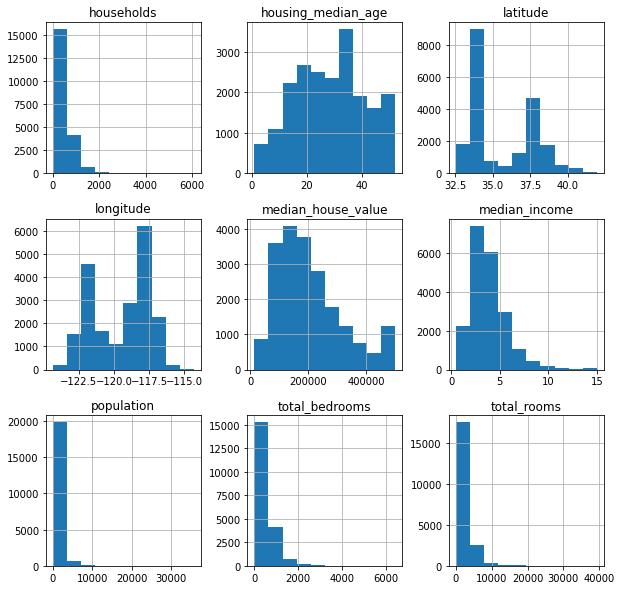

In [34]:
df.hist(figsize=(10,10))
plt.show();

In [40]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

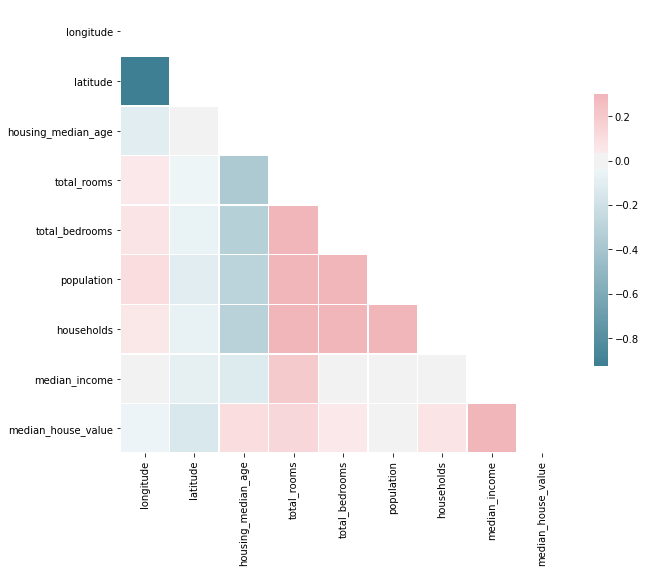

In [39]:
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [79]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

In [80]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [81]:
df = pd.get_dummies(df)
df.head()

<IPython.core.display.Javascript object>

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [82]:
df.iloc[:, -5:-1].head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_temp = df.drop("median_house_value", axis=1)
df_1  = pd.concat( [pd.DataFrame( scaler.fit_transform(df_temp), columns=df_temp.columns.values), df["median_house_value"]], axis=1)
df_1.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,452600.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,358500.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,352100.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,341300.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,342200.0


In [84]:
y = df["median_house_value"]
X = df.drop("median_house_value", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=123)

<IPython.core.display.Javascript object>

In [85]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr = LinearRegression()
ls = Lasso()
rr = Ridge()

In [90]:
#Linear Regression 
from sklearn.metrics import mean_squared_error, mean_absolute_error
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Linear Regression")
print("RMSE ==> ", rmse)
print(pd.DataFrame({"actual" :y_test, "predicted": pred }).sample(10))

<IPython.core.display.Javascript object>

Linear Regression
RMSE ==>  68734.90050559722


<IPython.core.display.Javascript object>

         actual      predicted
368    142900.0  204039.578605
18722   94200.0   74881.743781
4854   156600.0  163138.551670
1038   107200.0  107759.078881
2618    90200.0  153316.333375
4609   316700.0  158566.829732
6106   140200.0  197537.034778
15684  500001.0  314689.449602
19628  115500.0  122812.843765
12882  118500.0  158690.496588


In [92]:
# lasso 
ls.fit(X_train,y_train)
pred = ls.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Lasso Regression")
print("RMSE ==> ", rmse)
print(pd.DataFrame({"actual" :y_test, "predicted": pred }).sample(10))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6336641317899.258, tolerance: 21993620129.663795



<IPython.core.display.Javascript object>

Lasso Regression
RMSE ==>  68735.1968763212


<IPython.core.display.Javascript object>

         actual      predicted
17974  365500.0  362186.513998
7945   219500.0  254944.502739
14353  125000.0  184770.424815
9951   267600.0  177635.691690
11510  457100.0  278207.639088
13862  119700.0   78605.177183
3639   183800.0  229535.929903
6251   163300.0  208569.169940
14658  183000.0  283545.021722
13122  160200.0  140952.343098


In [91]:
# Ridge
rr.fit(X_train,y_train)
pred = rr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Ridge Regression")
print("RMSE ==> ", rmse)
print(pd.DataFrame({"actual" :y_test, "predicted": pred }).sample(10))

<IPython.core.display.Javascript object>

Ridge Regression
RMSE ==>  68735.29748177668


<IPython.core.display.Javascript object>

         actual      predicted
18447  233100.0  266240.231974
2296    74500.0   89674.966650
12275  112100.0  101668.159982
20109  137500.0   68192.548268
17206  275000.0  204344.514312
10329  270500.0  302236.588889
11767  134700.0  175672.070022
9685   152900.0  224203.646856
11513  485000.0  275225.153711
12686   82100.0   28103.394160
